<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 6: Data Exploration I (Univariate Data)

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

The dataset below contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. We will use this dataset for this lab.

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Lab6Q1.csv', header=None, names=['Age', 'Operation_year', 'axil_codes_det', 'Surv_status'])
df.head()

,Age,Operation_year,axil_codes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


a) <br>
i) Display the five number summary of the numerical data in the dataset.

In [2]:
#your solution
df.describe().iloc[3:]

,Age,Operation_year,axil_codes_det,Surv_status
min,30.00,58.00,0.0,1.0
25%,44.00,60.00,0.0,1.0
50%,52.00,63.00,1.0,1.0
75%,60.75,65.75,4.0,2.0
max,83.00,69.00,52.0,2.0


ii) Calculate the IQR of age (using code).

In [3]:
#your solution
df['Age'].quantile(.75) - df['Age'].quantile(.25)

16.75

iii) Calculate the range of operation year (using code).

In [4]:
#your solution
df.Operation_year.max() - df.Operation_year.min()

11

iv) Based on the five number summary from ai), state if the distribution of "Number of positive axillary nodes detected" is symmetric. Justify your answer clearly.

It is not symmetric, as the median is not directly in the middle of the min and max

b) <br>
i) Summarize the number of people who survived vs those who did not in a frequency table.

In [5]:
#your solution
bins = [0, 1, 2] 
labels = ('Alive', 'Dead')
groups = pd.cut(df['Surv_status'], bins=bins, labels=labels)
freq = groups.value_counts().sort_index() #sort data by index after counting
freqTable = pd.DataFrame(freq)
freqTable.columns = ['Frequency']
freqTable

,Frequency
Alive,225
Dead,81


ii) Plot the data using a pie chart. Give your chart a title.

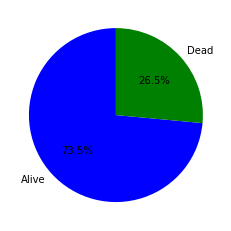

In [7]:
#your solution
import matplotlib.pyplot as plt 
plt.pie(
    freqTable['Frequency'],
    labels= freqTable.index,
    shadow=False,
    colors=['Blue', 'Green'],
    startangle=90,
    autopct='%1.1f%%',
    )
 
plt.show()

iii) Plot the data using a bar chart. Label your axis clearly. You should show the exact value of the bar on top of the respective bar.

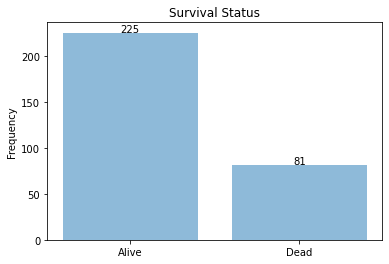

In [11]:
y = freqTable['Frequency']
x = freqTable.index
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x) #labelling on the x-axis
plt.ylabel('Frequency') #label of the y-axis
plt.title('Survival Status') 
 
for index,data in enumerate(y): #returns data in form (0,120), (1,76), (2,9)
    plt.text(x=index, y=data+1, #x,y position to place text 
             s=data, fontdict=dict(fontsize=10),  horizontalalignment='center')
             
plt.show()


c) We would like to see the distribution of the number of people who died based on the age. Plot a relevant graph for this.

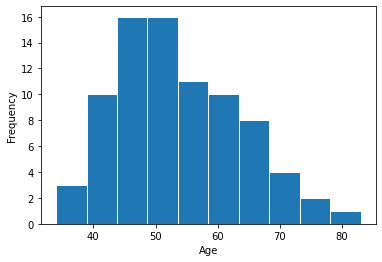

In [67]:
#your solution
plt.hist(df[df.Surv_status == 2]['Age'], bins=10, ec='w')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

d) Draw a side by side boxplot of people who surived and those who died.

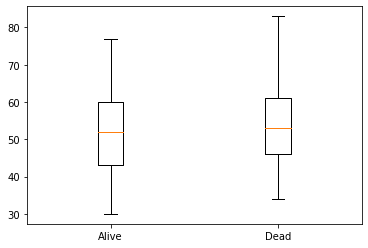

In [30]:
#your solution
plot = [df[df.Surv_status == 1]["Age"], df[df.Surv_status == 2]["Age"]]
box = plt.boxplot(plot,
                  positions=[1, 2],
                  labels=['Alive','Dead'])

e) Another common visualization similar to boxplot is the violin plot. 

i) Do a research on the violin plot and plot a violin plot similar to that in d). Note that there are a few variations in the violin plot based on parameters input. You should show each of them clearly and explain the differences. 

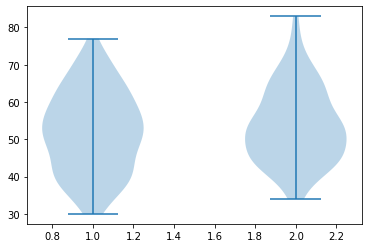

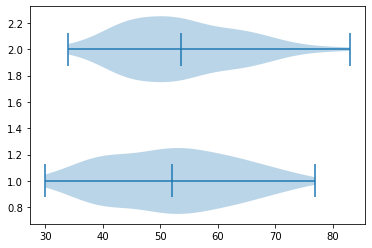

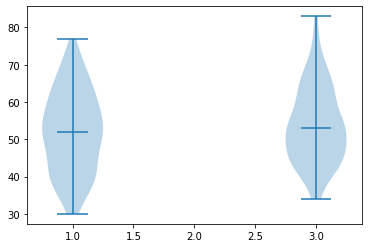

In [110]:
#your solution

plt.violinplot(plot,positions=[1, 2])
plt.show()
plt.violinplot(plot,positions=[1, 2], vert=False, showmeans=True)
plt.show()
plt.violinplot(plot,positions=[1, 3], showextrema=True, showmedians=True)
plt.show()

ii) Hence, explain the differences and similarities between boxplot and violinplot (when would one be preferred over the other).

**Violin shows the frequency distribution of the graph along with the spread, mean and median. When you would know the fequency, use violinplot. If you just want the data, you boxplot**

## Q2

The data below shows the age of the US presidents at their inaugurations.

In [101]:
import pandas as pd
import numpy as np
df2 = pd.read_csv('Lab6Q2.csv')
df2.head()

,President,Age
0,Washington,57
1,J. Adams,61
2,Jefferson,57
3,Madison,57
4,Monroe,58
5,J. Q. Adams,57
6,Jackson,61
7,Van Buren,54
8,W. H. Harrison,68
9,Tyler,51


a) Divide the range of the data into 6 classes of equal width. Count the number of observations in each class. To calculate the relative frequency, divide the frequency in each class by the total number of observations. You should store the data in a dataframe with 3 columns Class (i.e. interval), Frequency, Relative Frequency.

Sample output:
<table border="1" class="dataframe">
<thead>
<tr>
<th></th>
<th>Frequency</th>
<th>Relative Frequency</th>
</tr>
</thead>
<tbody>
<tr>
<td>40 &ndash; 44</td>
<td>2</td>
<td>0.045455</td>
</tr>
<tr>
<td>45 &ndash; 49</td>
<td>7</td>
<td>0.159091</td>
</tr>
</tbody>
</table>

In [89]:
#your solution
bins=[39, 44, 49, 54, 59, 64, 69]
labels = ('40-44', '45-49', '50-54', '55-59', '60-64', '65-69')
df3 = pd.concat([pd.cut(df2['Age'], bins=bins, labels=labels).value_counts(),pd.cut(df2['Age'], bins=bins, labels=labels).value_counts()/len(df2)], axis=1).sort_index(ascending=True)
df3.columns = ['Frequency', 'Relative Frequency']
df3

,Frequency,Relative Frequency
40-44,2,0.045455
45-49,7,0.159091
50-54,13,0.295455
55-59,12,0.272727
60-64,7,0.159091
65-69,3,0.068182


b) Plot a histogram with the class interval from (a)

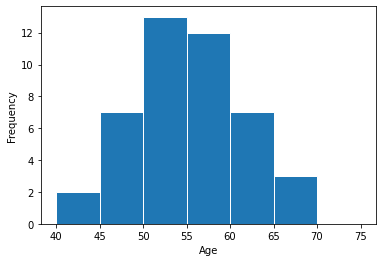

In [72]:
#your solution
plt.hist(df2['Age'],bins=range(40, 80, 5) , ec='w')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

c) Add in two columns on Cumulative Frequency and Relative Cumulative Frequency into the frequency table.

Sample output:
<table border="1" class="dataframe">
<thead>
<tr>
<th></th>
<th>Frequency</th>
<th>Relative Frequency</th>
<th>Cumulative Frequency</th>
<th>Relative Cumulative Frequency</th>
</tr>
</thead>
<tbody>
<tr>
<td>40 &ndash; 44</td>
<td>2</td>
<td>0.045455</td>
<td>2</td>
<td>0.045455</td>
</tr>
<tr>
<td>45 &ndash; 49</td>
<td>7</td>
<td>0.159091</td>
<td>9</td>
<td>0.204545</td>
</tr>
</tbody>
</table>

In [92]:
#your solution
df3['Cumulative Frequency'] = df3['Frequency'].cumsum()
df3['Relative Cumulative Frequency'] = df3['Relative Frequency'].cumsum()
df3

,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
40-44,2,0.045455,2,0.045455
45-49,7,0.159091,9,0.204545
50-54,13,0.295455,22,0.500000
55-59,12,0.272727,34,0.772727
60-64,7,0.159091,41,0.931818
65-69,3,0.068182,44,1.000000


d) Plot a cumulative frequency histogram below.

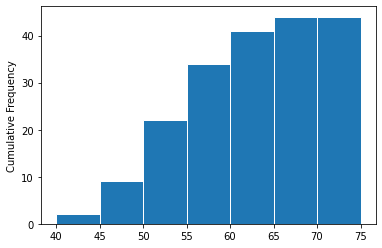

In [95]:
#your solution
plt.hist(df2['Age'], bins=np.arange(40,80,5), cumulative=True, ec='w')
plt.ylabel('Cumulative Frequency')
plt.show()

e) Read up on <a href="https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/">Empirical cumulative distribution function (ECDF)</a> and plot a ECDF for the data given.

Briefly explain your understanding of ECDF below.



<AxesSubplot:xlabel='Age', ylabel='Proportion'>

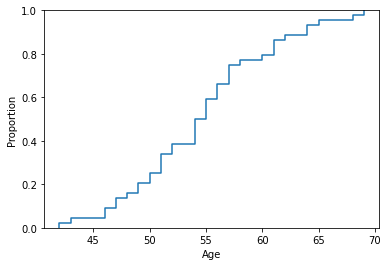

In [100]:
#your solution
import seaborn
seaborn.ecdfplot(df2, x='Age')

**ECDF is a relative frequency cumulative distribution. It plots based on the amount of values lower than the current value**


Hence, what percentage of US presidents were younger than Barack Obama when they were inaugurated?

Obama was 47 years old when he became president. Looking at the distributionat the y-value when x is 47, only 0.1 of the proprtion is younger than Obama